In [1]:
import pandas as pd
import numpy as np

from nltk.tokenize import RegexpTokenizer, sent_tokenize, word_tokenize 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import pickle

In [2]:
df = pd.read_csv('urls.csv')

In [3]:
malicious = df[df.label.eq(1)]
safe = df[df.label.eq(0)]

In [4]:
safe_sample = safe.sample(n = 50000)

In [5]:
malicious_sample = malicious.sample(55000)

In [6]:
sampled = pd.concat([malicious_sample, safe_sample])

In [7]:
sampled.drop_duplicates(subset = 'url', inplace = True)

In [8]:
sampled.to_csv('sampled.csv', index = False)

## Split the data

In [9]:
X = sampled['url']
y = sampled['label']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

## Pipleline

In [11]:
ss = StandardScaler(with_mean=False)
logit = LogisticRegression(max_iter = 1000, C = 10)
vectorizer = HashingVectorizer(tokenizer=RegexpTokenizer('\\W', gaps = True).tokenize)#analyzer=token_function)

In [12]:
pipe = make_pipeline(vectorizer, ss, logit)

In [13]:
pipe.fit(X_train, y_train)

/Users/kevinrenois/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Pipeline(steps=[('hashingvectorizer',
                 HashingVectorizer(tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='\\W', gaps=True, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression',
                 LogisticRegression(C=10, max_iter=1000))])

In [14]:
print('TEST SCORE: ', pipe.score(X_test, y_test)) 
print('TRAIN SCORE: ', pipe.score(X_train, y_train))

TEST SCORE:  0.9846857142857143
TRAIN SCORE:  1.0


In [15]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

y_preds = pipe.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[12378,   122],
       [  280, 13470]])

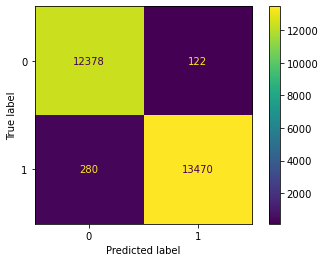

In [16]:
plot_confusion_matrix(pipe, X_test, y_test)

In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()

In [18]:
sensitivity = tp/(tp + fn)
sensitivity

0.9796363636363636

In [19]:
pickle.dump(pipe, open('model.p', 'wb'))

---

In [ ]:
# I could not figure out how to add the following feature vectors to my pipeline without creating a custom transformer class. 
# That will be part of my future work.

## Feature Vectors

In [21]:
test = 'http://br-ofertasimperdiveis.epizy.com/produto.php?linkcompleto=iphone-6-plus-apple-64gb-cinza-espacial-tela-5-5-retina-4g-camera-8mp-frontal-ios-10-proc.-m8/p/2116558/te/ipho/&amp;id=10'

In [22]:
#regex = RegexpTokenizer('(?:[^/]|://)+')

In [23]:
from urllib.parse import urlparse, parse_qs

In [24]:
t = urlparse(test)

In [25]:
t

ParseResult(scheme='http', netloc='br-ofertasimperdiveis.epizy.com', path='/produto.php', params='', query='linkcompleto=iphone-6-plus-apple-64gb-cinza-espacial-tela-5-5-retina-4g-camera-8mp-frontal-ios-10-proc.-m8/p/2116558/te/ipho/&amp;id=10', fragment='')

In [26]:
t.scheme

'http'

In [27]:
t.netloc

'br-ofertasimperdiveis.epizy.com'

In [28]:
t.path

'/produto.php'

In [29]:
t.params

''

In [30]:
t.query

'linkcompleto=iphone-6-plus-apple-64gb-cinza-espacial-tela-5-5-retina-4g-camera-8mp-frontal-ios-10-proc.-m8/p/2116558/te/ipho/&amp;id=10'

In [31]:
t.fragment

''

In [32]:
new_df = sampled.copy()

In [33]:

scheme_list = []
for x in new_df['url']:
    y = urlparse(x)
    scheme_list.append(y.scheme)

new_df['scheme'] = scheme_list
    

In [34]:
netloc_list = []
for x in new_df['url']:
    y = urlparse(x)
    netloc_list.append(y.netloc)

new_df['netloc'] = netloc_list

In [35]:
path_list = []
for x in new_df['url']:
    y = urlparse(x)
    path_list.append(y.path)

new_df['path'] = path_list

In [36]:
params_list = []
for x in new_df['url']:
    y = urlparse(x)
    params_list.append(y.params)

new_df['params'] = params_list

In [37]:
query_list = []
for x in new_df['url']:
    y = urlparse(x)
    query_list.append(y.query)

new_df['query'] = query_list

In [38]:
fragment_list = []
for x in new_df['url']:
    y = urlparse(x)
    fragment_list.append(y.fragment)

new_df['fragment'] = fragment_list

In [39]:
new_df

,url,label,scheme,netloc,path,params,query,fragment
132130,criatoriomontesclaros.com.br/site/index.html?p...,1,,,criatoriomontesclaros.com.br/site/index.html,,p=galeria&pg=1,
82183,chambopercussion.com/es/contacto,1,,,chambopercussion.com/es/contacto,,,
57850,radiovillage.eu/index.php/rvcommunity/102-ucce...,1,,,radiovillage.eu/index.php/rvcommunity/102-ucce...,,,
50936,burkinasaracanarias.org/es/component/content/a...,1,,,burkinasaracanarias.org/es/component/content/a...,,,
49431,eroscarboni.com/index.php?option=com_content&v...,1,,,eroscarboni.com/index.php,,option=com_content&view=article&id=321:factory...,
...,...,...,...,...,...,...,...,...
553732,accringtonstanley.co.uk,0,,,accringtonstanley.co.uk,,,
1126789,gscsjl.com,0,,,gscsjl.com,,,
913851,sandispmohu.ml,0,,,sandispmohu.ml,,,
206751,trec.texas.gov,0,,,trec.texas.gov,,,


In [40]:
new_df['scheme_len'] = [len(i) for i in new_df['scheme']]
new_df['netloc_len'] = [len(i) for i in new_df['netloc']]
new_df['path_len'] = [len(i) for i in new_df['path']]
new_df['params_len'] = [len(i) for i in new_df['params']]
new_df['query_len'] = [len(i) for i in new_df['query']]
new_df['fragment_len'] = [len(i) for i in new_df['fragment']]

In [41]:
new_df

,url,label,scheme,netloc,path,params,query,fragment,scheme_len,netloc_len,path_len,params_len,query_len,fragment_len
132130,criatoriomontesclaros.com.br/site/index.html?p...,1,,,criatoriomontesclaros.com.br/site/index.html,,p=galeria&pg=1,,0,0,44,0,14,0
82183,chambopercussion.com/es/contacto,1,,,chambopercussion.com/es/contacto,,,,0,0,32,0,0,0
57850,radiovillage.eu/index.php/rvcommunity/102-ucce...,1,,,radiovillage.eu/index.php/rvcommunity/102-ucce...,,,,0,0,71,0,0,0
50936,burkinasaracanarias.org/es/component/content/a...,1,,,burkinasaracanarias.org/es/component/content/a...,,,,0,0,109,0,0,0
49431,eroscarboni.com/index.php?option=com_content&v...,1,,,eroscarboni.com/index.php,,option=com_content&view=article&id=321:factory...,,0,0,25,0,116,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553732,accringtonstanley.co.uk,0,,,accringtonstanley.co.uk,,,,0,0,23,0,0,0
1126789,gscsjl.com,0,,,gscsjl.com,,,,0,0,10,0,0,0
913851,sandispmohu.ml,0,,,sandispmohu.ml,,,,0,0,14,0,0,0
206751,trec.texas.gov,0,,,trec.texas.gov,,,,0,0,14,0,0,0
